In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
#df = pd.read_csv('all_data.csv') all data is the original raw file
df = pd.read_csv('cleaned_data_drop.csv') #cleaned data drop is the file remaining after droping duplicates

In [35]:
print (df.shape)

(329064, 27)


In [ ]:
df = df.dropna()

In [39]:
print (df.shape)

(329063, 27)


In [40]:
# if using clean data
print("Original Attack Distribution:")
print(df['Attack'].value_counts())

#dropping values to balance classes normal and neptune
num_normal_cases_to_drop = 272000  # Change this number as needed for "normal"
num_neptune_cases_to_drop = 45000   # Change this number as needed for "neptune"

# Filter the DataFrame for the "normal" and "neptune" classes
normal_cases = df[df['Attack'] == 'normal']
neptune_cases = df[df['Attack'] == 'neptune']

# Randomly drop specified cases from the "normal" and "neptune" classes
normal_cases_dropped = normal_cases.sample(n=len(normal_cases) - num_normal_cases_to_drop, random_state=42)
neptune_cases_dropped = neptune_cases.sample(n=len(neptune_cases) - num_neptune_cases_to_drop, random_state=42)

# Combine data
modified_df = pd.concat([normal_cases_dropped, neptune_cases_dropped, df[df['Attack'] != 'normal'][df['Attack'] != 'neptune']])

# Print the new distribution after dropping cases
print("\nModified Attack Distribution:")
print(modified_df['Attack'].value_counts())

print (df.shape)
print (modified_df.shape)

Original Attack Distribution:
Attack
normal          274044
neptune          47017
ipsweep           1985
nmap              1554
satan             1338
smurf             1244
portsweep          834
back               755
teardrop           199
guess_passwd        53
pod                 40
Name: count, dtype: int64

Modified Attack Distribution:
Attack
normal          2044
neptune         2017
ipsweep         1985
nmap            1554
satan           1338
smurf           1244
portsweep        834
back             755
teardrop         199
guess_passwd      53
pod               40
Name: count, dtype: int64
(329063, 27)
(12063, 27)


/var/folders/dj/vmwrtby9251ftsf2vh4ktjd00000gn/T/ipykernel_30058/1057730177.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  modified_df = pd.concat([normal_cases_dropped, neptune_cases_dropped, df[df['Attack'] != 'normal'][df['Attack'] != 'neptune']])


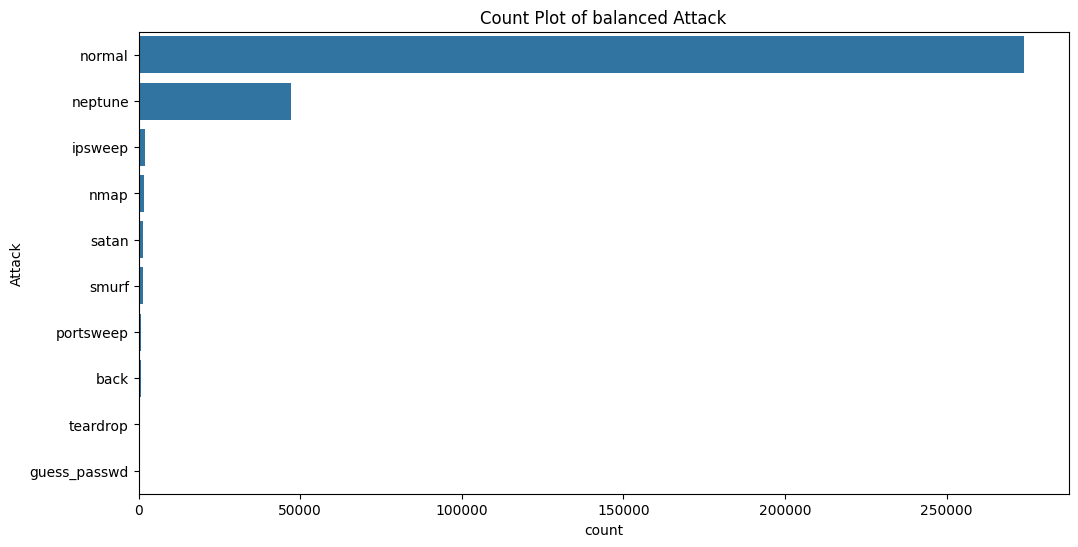

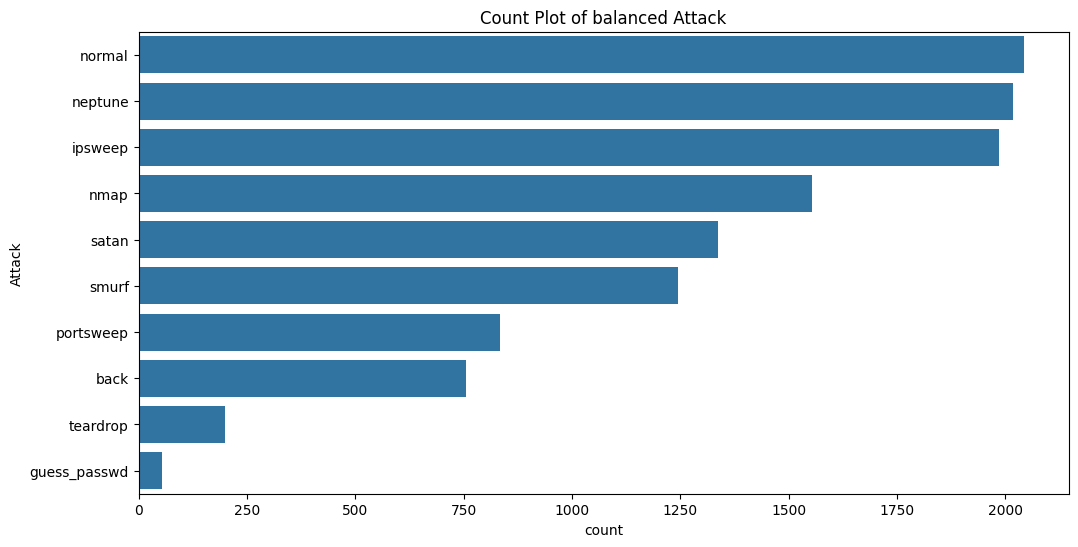

In [41]:
# Select a specific categorical column
column = 'Attack'

# Bar Plot / Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(y=df[column], order=df[column].value_counts().index[:10])  # Top 10 most frequent values
plt.title(f'Count Plot of balanced {column}')
plt.show()

# Bar Plot / Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(y=modified_df[column], order=modified_df[column].value_counts().index[:10])  # Top 10 most frequent values
plt.title(f'Count Plot of balanced {column}')
plt.show()

In [ ]:
# Select a specific categorical column
column = 'protocol_typesymbolic'

# Bar Plot / Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(y=df[column], order=df[column].value_counts().index[:10])  # Top 10 most frequent values
plt.title(f'Count Plot of balanced {column}')
plt.show()

In [ ]:
# Select a specific categorical column
column = 'protocol_typesymbolic'

# Bar Plot / Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(y=modified_df[column], order=modified_df[column].value_counts().index[:10])  # Top 10 most frequent values
plt.title(f'Count Plot of balanced {column}')
plt.show()

In [ ]:
# Select a specific categorical column
column = 'servicesymbolic'

# Bar Plot / Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(y=modified_df[column], order=modified_df[column].value_counts().index[:10])  # Top 10 most frequent values
plt.title(f'Count Plot of balanced {column}')
plt.show()

# Bar Plot / Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(y=df[column], order=df[column].value_counts().index[:10])  # Top 10 most frequent values
plt.title(f'Count Plot of {column}')
plt.show()

In [ ]:
# Select a specific categorical column
column = 'flagsymbolic'

# Bar Plot / Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(y=modified_df[column], order=modified_df[column].value_counts().index[:10])  # Top 10 most frequent values
plt.title(f'Count Plot of balanced {column}')
plt.show()

# Bar Plot / Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(y=df[column], order=df[column].value_counts().index[:10])  # Top 10 most frequent values
plt.title(f'Count Plot of {column}')
plt.show()

In [46]:
# Encoding the 'Attack' column
label_encoder = LabelEncoder()
modified_df['Attack'] = label_encoder.fit_transform(modified_df['Attack'])

#Encoding the other categorical columns
modified_df = pd.get_dummies(modified_df, columns=['protocol_typesymbolic', 'servicesymbolic', 'flagsymbolic'])

# Feature Selection
X = modified_df.drop(columns=['Attack'])
y = modified_df['Attack']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Check dataset
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9047, 103)
y_train shape: (9047,)
X_test shape: (3016, 103)
y_test shape: (3016,)


In [ ]:
# Convert target variable to categorical (one-hot encoded for multi-class classification) matrix
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Modify the ANN model with Dropout to prevent overfitting
model = Sequential()

# Input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Hidden layers with dropout
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(units=y_train_cat.shape[1], activation='sigmoid'))

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_data=(X_test, y_test_cat))

# Perform predictions on the test set
y_pred = model.predict(X_test)
# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Check the shape of predictions
print("Shape of y_pred:", y_pred.shape)
print("Shape of y_test:", y_test_cat.shape)

# Convert y_test_cat back to class labels
y_test_labels = np.argmax(y_test_cat, axis=1)


In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.2f}")

In [ ]:
for layer in model.layers:
    weights = layer.get_weights()  # Get weights and biases
    print(f"Weights for layer {layer.name}: {weights}")


In [52]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of X_test: (3016, 103)
Shape of y_test: (3016,)
Shape of y_pred: (3016, 11)


In [ ]:
# Plotting Training and Validation Loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()

In [54]:
# Get the predicted class labels from the predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_classes))
print("Root Mean Square Error (RMSE):", rmse)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = model.predict(X_test)

# Calculate roc
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot roc
plt.figure()
plt.plot(fpr_micro, tpr_micro, label='ROC curve (area = {0:0.2f})'.format(roc_auc_micro))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')

plt.show()


In [57]:
attack_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Print the mapping
for encoded_value, attack_label in attack_mapping.items():
    print(f"{encoded_value}: {attack_label}")


0: back
1: guess_passwd
2: ipsweep
3: neptune
4: nmap
5: normal
6: pod
7: portsweep
8: satan
9: smurf
10: teardrop


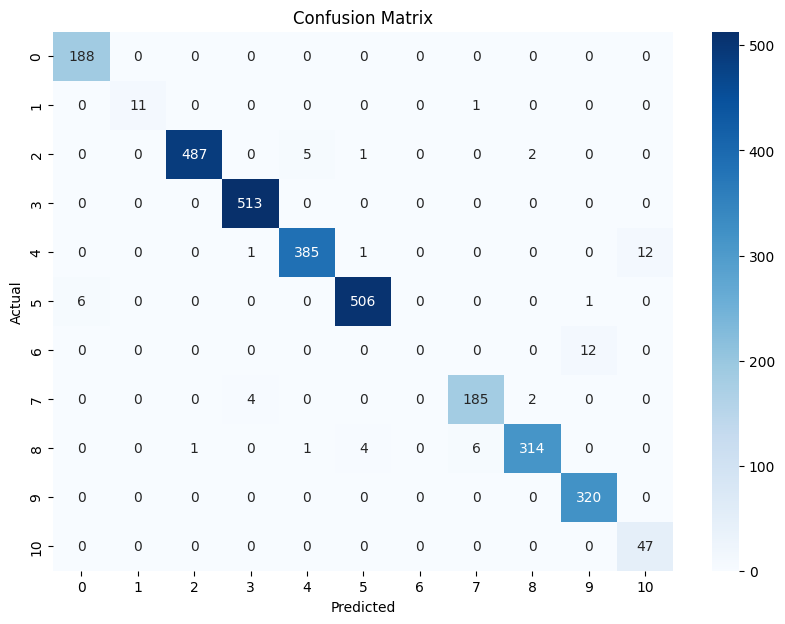

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_classes = np.argmax(y_pred_bin, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.980106100795756
Precision: 0.9771117437911353
Recall: 0.980106100795756
F1 Score: 0.9783236385376325


/Users/rahmanahmed/Py/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
# Save the trained model
# model.save('ann_model.keras')
# model.save('ann_model.h5')


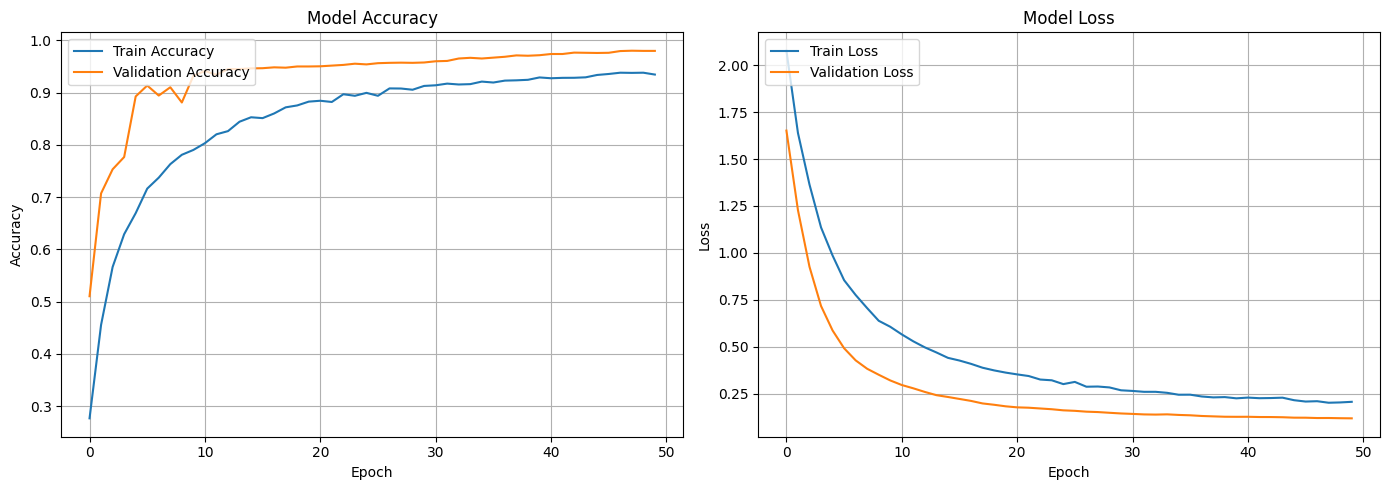

In [62]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_training_history(history)
